In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\wyy_2.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,8.2,8.5,8.2,8.3,8.3,5700
1,2008-08-11,8.2,8.4,8.2,8.4,8.4,300
2,2008-08-12,8.2,8.4,7.8,8.4,8.4,800
3,2008-08-13,8.0,8.4,7.5,8.2,8.2,5700
4,2008-08-14,7.5,8.9,7.5,8.5,8.5,9000
...,...,...,...,...,...,...,...
2903,2020-02-21,5.1,5.1,5.0,5.1,5.1,45800
2904,2020-02-24,4.8,5.0,4.8,4.9,4.9,20000
2905,2020-02-25,5.0,5.1,4.6,4.7,4.7,35300
2906,2020-02-26,4.7,4.9,4.4,4.6,4.6,27300


In [3]:
data_training = data[data['Date'] < '2019-10-31'].copy()
data_testing = data[data['Date'] >= '2019-10-31'].copy()

In [4]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [5]:
data_training.shape

(2827, 5)

In [6]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.23529412e-01, 3.12796209e-01, 3.60000000e-01, 3.33333333e-01,
        6.10867002e-03],
       [3.23529412e-01, 3.08056872e-01, 3.60000000e-01, 3.38235294e-01,
        3.21508949e-04],
       [3.23529412e-01, 3.08056872e-01, 3.40000000e-01, 3.38235294e-01,
        8.57357196e-04],
       ...,
       [9.31372549e-02, 8.53080569e-02, 1.20000000e-01, 9.80392157e-02,
        1.12528132e-02],
       [8.82352941e-02, 7.58293839e-02, 1.15000000e-01, 9.31372549e-02,
        7.18036652e-03],
       [8.82352941e-02, 7.58293839e-02, 1.15000000e-01, 8.82352941e-02,
        9.00225056e-03]])

In [7]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train.shape

(2727, 100, 5)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 110, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           21280     
_________________________________________________________________
dropout (Dropout)            (None, 100, 70)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 90)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 110)          88440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 110)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               1

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
86/86 [==============================] - 29s 337ms/step - loss: 0.0168
Epoch 2/125
86/86 [==============================] - 30s 351ms/step - loss: 0.0043
Epoch 3/125
86/86 [==============================] - 35s 405ms/step - loss: 0.0036
Epoch 4/125
86/86 [==============================] - 32s 375ms/step - loss: 0.0031
Epoch 5/125
86/86 [==============================] - 34s 391ms/step - loss: 0.0030
Epoch 6/125
86/86 [==============================] - 32s 371ms/step - loss: 0.0028
Epoch 7/125
86/86 [==============================] - 31s 362ms/step - loss: 0.0026
Epoch 8/125
86/86 [==============================] - 32s 378ms/step - loss: 0.0024
Epoch 9/125
86/86 [==============================] - 31s 360ms/step - loss: 0.0022
Epoch 10/125
86/86 [==============================] - 31s 356ms/step - loss: 0.0021
Epoch 11/125
86/86 [==============================] - 33s 379ms/step - loss: 0.0018
Epoch 12/125
86/86 [==============================] - 32s 367ms/step - loss: 0.0021
E

In [13]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2827,2019-10-31,3.3,3.3,3.2,3.2,3.2,6500
2828,2019-11-01,3.3,3.3,3.2,3.2,3.2,1300
2829,2019-11-04,3.2,3.5,3.2,3.4,3.4,14800
2830,2019-11-05,3.4,3.5,3.4,3.5,3.5,6000
2831,2019-11-06,3.5,3.5,3.3,3.4,3.4,6500


In [14]:
past_60_days = data_testing.tail(60)

In [15]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,3.8,3.8,3.6,3.6,9800
1,3.6,3.8,3.6,3.7,12000
2,3.7,3.9,3.5,3.7,18500
3,3.6,3.8,3.6,3.7,16600
4,3.7,3.9,3.6,3.8,16400


In [16]:
inputs = scaler.transform(df)
inputs

array([[0.10784314, 0.09004739, 0.13      , 0.10294118, 0.01050263],
       [0.09803922, 0.09004739, 0.13      , 0.10784314, 0.01286036],
       [0.10294118, 0.09478673, 0.125     , 0.10784314, 0.01982639],
       [0.09803922, 0.09004739, 0.13      , 0.10784314, 0.01779016],
       [0.10294118, 0.09478673, 0.13      , 0.1127451 , 0.01757582],
       [0.1127451 , 0.11374408, 0.14      , 0.13235294, 0.05840746],
       [0.13235294, 0.11374408, 0.15      , 0.12254902, 0.02314864],
       [0.13235294, 0.11374408, 0.15      , 0.12254902, 0.02164827],
       [0.11764706, 0.10900474, 0.15      , 0.12254902, 0.01318187],
       [0.11764706, 0.10900474, 0.15      , 0.12745098, 0.02486336],
       [0.12254902, 0.1042654 , 0.15      , 0.12745098, 0.01436073],
       [0.11764706, 0.10900474, 0.15      , 0.12254902, 0.01586111],
       [0.12254902, 0.10900474, 0.15      , 0.12254902, 0.01832601],
       [0.11764706, 0.09952607, 0.15      , 0.12254902, 0.00996678],
       [0.12254902, 0.1042654 , 0.

In [17]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((81, 60, 5), (81,))

In [18]:
x_test.shape

(81, 60, 5)

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
scaler.scale_

array([4.90196078e-02, 4.73933649e-02, 5.00000000e-02, 4.90196078e-02,
       1.07169650e-06])

In [21]:
scale = 1 / 4.90196078e-02
scale

20.400000017952003

In [22]:
y_pred = y_pred * scale 
y_test = y_test * scale

In [23]:
y_pred.shape

(81, 1)

In [24]:
y_test.shape

(81,)

In [28]:
y_pred[30:]

array([[2.931976 ],
       [2.9445505],
       [2.9387743],
       [2.9312704],
       [2.9299273],
       [2.904213 ],
       [2.8988614],
       [2.8981555],
       [2.8659143],
       [2.8255107],
       [2.8438988],
       [2.8391263],
       [2.9043179],
       [2.9574573],
       [2.9111953],
       [2.9252968],
       [2.943291 ],
       [2.9384644],
       [2.9638891],
       [2.9829998],
       [2.981001 ],
       [2.9528744],
       [3.0293639],
       [3.115881 ],
       [3.11765  ],
       [3.1102133],
       [3.1034334],
       [3.2249498],
       [3.360772 ],
       [3.4976144],
       [3.541482 ],
       [3.529086 ],
       [3.494904 ],
       [3.4141414],
       [3.3692527],
       [3.33261  ],
       [3.322507 ],
       [3.306518 ],
       [3.2948472],
       [3.3718665],
       [3.3891406],
       [3.396749 ],
       [3.3882606],
       [3.3939714],
       [3.3854265],
       [3.4618912],
       [3.5798528],
       [3.695852 ],
       [3.6666822],
       [3.6035721],


In [29]:
y_test[30:]

array([2.4, 2.5, 2.4, 2.5, 2.4, 2.5, 2.5, 2.4, 2.2, 2.2, 2.4, 2.4, 2.7,
       2.7, 2.2, 2.4, 2.3, 2.5, 2.6, 2.3, 2.4, 2.8, 2.7, 2.7, 2.7, 2.7,
       2.6, 3.2, 3.2, 3.4, 3.3, 3.3, 3.1, 2.9, 3. , 2.9, 2.8, 2.9, 3.1,
       3.1, 3.2, 3.1, 3. , 3.1, 3.1, 3.3, 3.5, 3.2, 3.4, 3.1, 3. ])

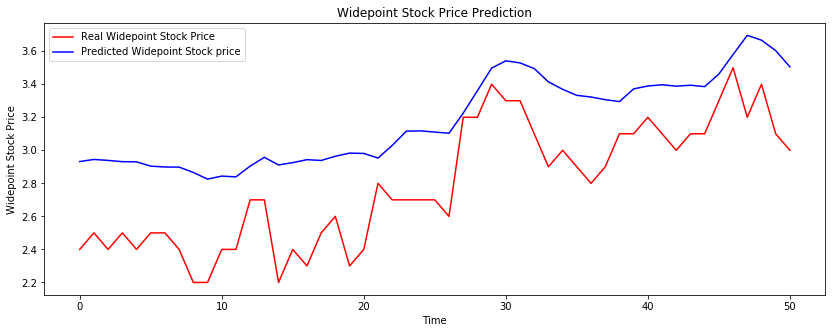

In [30]:
plt.figure(figsize = (14,5))
plt.plot(y_test[30:], color = 'red', label = 'Real Widepoint Stock Price')
plt.plot(y_pred[30:], color = 'blue', label = 'Predicted Widepoint Stock price')
plt.title('Widepoint Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Widepoint Stock Price')
plt.legend()
plt.show()